In [95]:
import pandas as pd
import numpy as np

In [144]:
# Carregando dados
import glob

def df_all_folder(path):
    
    all_files = glob.glob(path + "*_por_tema_tweets.csv*")
    print(all_files)
    li = []
    
    for filename in all_files:
        print(filename)
        df = pd.read_csv(filename, index_col=0)
        li.append(df)
    names = []
    for filename in all_files:
        x = filename.replace(path, "")
        x = x.replace("_por_tema_tweets.csv", "")
        names.append(x.replace(" ","_"))
    return pd.concat(li, axis=0, keys =names).reset_index().drop(columns=['level_1']).rename(columns={'level_0': "candidato"})

In [145]:
path = "dados/ultimos_7_dias/"
df = df_all_folder(path)

['dados/ultimos_7_dias/sofia manzano_por_tema_tweets.csv', 'dados/ultimos_7_dias/ciro_por_tema_tweets.csv', 'dados/ultimos_7_dias/luiz_por_tema_tweets.csv', 'dados/ultimos_7_dias/vera lucia_por_tema_tweets.csv', 'dados/ultimos_7_dias/leonardo pericles_por_tema_tweets.csv', 'dados/ultimos_7_dias/janones_por_tema_tweets.csv', 'dados/ultimos_7_dias/simone tebet_por_tema_tweets.csv', 'dados/ultimos_7_dias/bolsonaro_por_tema_tweets.csv', 'dados/ultimos_7_dias/pablo macal_por_tema_tweets.csv', 'dados/ultimos_7_dias/eymael_por_tema_tweets.csv', 'dados/ultimos_7_dias/lula_por_tema_tweets.csv', 'dados/ultimos_7_dias/bivar_por_tema_tweets.csv']
dados/ultimos_7_dias/sofia manzano_por_tema_tweets.csv
dados/ultimos_7_dias/ciro_por_tema_tweets.csv
dados/ultimos_7_dias/luiz_por_tema_tweets.csv
dados/ultimos_7_dias/vera lucia_por_tema_tweets.csv
dados/ultimos_7_dias/leonardo pericles_por_tema_tweets.csv
dados/ultimos_7_dias/janones_por_tema_tweets.csv
dados/ultimos_7_dias/simone tebet_por_tema_tweets.

In [185]:
df

,candidato,ditadura,reforma trabalhista,feminismo,reforma agrária,corrupção,segurança
0,sofia_manzano,0,0,0,0,0,0
1,sofia_manzano,0,1,0,0,0,0
2,sofia_manzano,0,0,0,1,0,0
3,sofia_manzano,0,0,0,0,0,0
4,sofia_manzano,0,0,0,0,0,0
...,...,...,...,...,...,...,...
91,bivar,0,0,0,0,5,0
92,bivar,0,0,0,0,7,0
93,bivar,0,1,0,0,5,0
94,bivar,0,0,0,0,3,0


In [178]:
import matplotlib.pyplot as plt

def create_barplot(df, column, theme):
    return df.groupby(column)[theme].sum().plot(kind='bar')


In [201]:
import matplotlib.pyplot as plt

def generate_barplots_by_topic(df, topic):
    topics = df.columns
    path = 'images/candidatos_por_topico_bar/'
    for x in topics:
        if x != topic:
            barplot = create_barplot(df, topic, x)
            barplot.figure.savefig(path + x.replace(" ", "_") + ".png")

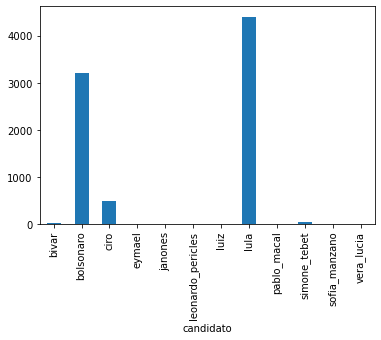

In [202]:
generate_barplots_by_topic(df, "candidato")

In [184]:
df.columns

Index(['candidato', 'ditadura', 'reforma trabalhista', 'feminismo',
       'reforma agrária', 'corrupção', 'segurança'],
      dtype='object')

candidato
bivar                 0
bolsonaro            70
ciro                  6
eymael                0
janones               0
leonardo_pericles     0
luiz                  0
lula                 37
pablo_macal           0
simone_tebet          0
sofia_manzano         1
vera_lucia            0
Name: reforma agrária, dtype: int64


<AxesSubplot:xlabel='candidato'>

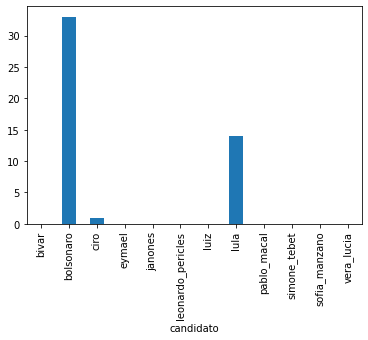

In [164]:
import matplotlib.pyplot as plt

reforma_agraria = df.groupby("candidato")['reforma agrária'].sum()
print(reforma_agraria)
feminismo.plot(kind='bar')

In [170]:
!mkdir images